In [ ]:
import os # operating system
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # standard graphics
import seaborn as sns # fancier graphics
from scipy import stats
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sobar-72.csv to sobar-72.csv


In [ ]:
sobar = pd.read_csv("sobar-72.csv")

In [ ]:
sobar.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [ ]:
sobar.tail()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
67,10,14,14,10,15,6,7,5,15,14,10,15,13,9,8,12,12,11,9,0
68,10,12,15,10,15,8,8,5,15,14,8,12,14,11,7,13,15,11,14,0
69,10,8,11,6,10,6,4,3,13,9,8,14,12,9,7,11,12,10,10,0
70,9,12,13,10,13,6,6,5,14,13,10,13,12,11,8,12,11,13,15,0
71,10,14,14,6,12,7,8,5,15,12,10,10,13,11,9,14,13,15,15,0


In [ ]:
sobar.shape

(72, 20)

In [ ]:
sobar.dtypes

behavior_sexualRisk           int64
behavior_eating               int64
behavior_personalHygine       int64
intention_aggregation         int64
intention_commitment          int64
attitude_consistency          int64
attitude_spontaneity          int64
norm_significantPerson        int64
norm_fulfillment              int64
perception_vulnerability      int64
perception_severity           int64
motivation_strength           int64
motivation_willingness        int64
socialSupport_emotionality    int64
socialSupport_appreciation    int64
socialSupport_instrumental    int64
empowerment_knowledge         int64
empowerment_abilities         int64
empowerment_desires           int64
ca_cervix                     int64
dtype: object

In [ ]:
sobar.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


In [ ]:
sobar.isnull().sum()

behavior_sexualRisk           0
behavior_eating               0
behavior_personalHygine       0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appreciation    0
socialSupport_instrumental    0
empowerment_knowledge         0
empowerment_abilities         0
empowerment_desires           0
ca_cervix                     0
dtype: int64

In [ ]:
sobar.corr()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
behavior_sexualRisk,1.000000,-0.165857,0.003912,-0.005779,0.126616,-0.067541,-0.057420,0.057869,0.158799,0.175791,0.067469,-0.041937,0.309357,0.076449,0.102404,0.104478,0.173936,0.206222,0.285072,-0.311138
behavior_eating,-0.165857,1.000000,0.224623,0.116634,0.116075,0.124197,0.307610,0.038376,-0.048262,-0.000407,-0.077467,-0.141732,-0.077380,-0.076671,-0.013382,0.061665,0.060272,-0.015987,0.052121,0.200358
behavior_personalHygine,0.003912,0.224623,1.000000,0.441812,0.009613,0.152173,-0.118433,0.237063,0.252655,0.139975,0.252095,0.386605,0.432542,0.388862,0.354117,0.097603,0.444124,0.391971,0.199207,-0.372740
intention_aggregation,-0.005779,0.116634,0.441812,1.000000,0.265216,-0.039642,-0.175529,0.116701,0.059118,-0.044997,0.061595,0.337717,0.277540,0.188725,0.080188,0.035303,0.267148,0.106073,0.127319,-0.291717
intention_commitment,0.126616,0.116075,0.009613,0.265216,1.000000,-0.005897,0.229804,0.012453,-0.031610,-0.012274,-0.022190,0.180654,0.104314,0.000796,0.016037,0.015975,0.145965,0.056755,0.176077,-0.237040
attitude_consistency,-0.067541,0.124197,0.152173,-0.039642,-0.005897,1.000000,0.201706,0.187284,0.202935,0.180230,0.231020,0.062041,-0.089630,-0.170591,-0.045223,-0.066155,0.044390,-0.088804,-0.092052,0.125447
attitude_spontaneity,-0.057420,0.307610,-0.118433,-0.175529,0.229804,0.201706,1.000000,-0.138451,-0.101091,-0.075221,-0.101405,-0.051348,-0.109238,-0.090397,-0.132567,0.061354,0.134418,0.030986,0.107343,0.084590
norm_significantPerson,0.057869,0.038376,0.237063,0.116701,0.012453,0.187284,-0.138451,1.000000,0.643154,0.605689,0.636146,0.145434,0.054963,-0.037541,-0.214654,-0.248162,-0.102884,-0.049040,-0.123428,-0.293836
norm_fulfillment,0.158799,-0.048262,0.252655,0.059118,-0.031610,0.202935,-0.101091,0.643154,1.000000,0.792727,0.853534,0.130784,0.064407,-0.107139,-0.165258,-0.308588,-0.001287,0.032818,-0.112513,-0.427674
perception_vulnerability,0.175791,-0.000407,0.139975,-0.044997,-0.012274,0.180230,-0.075221,0.605689,0.792727,1.000000,0.809409,0.097417,0.098339,0.004194,-0.036572,-0.063245,0.153103,0.172650,0.126936,-0.423109


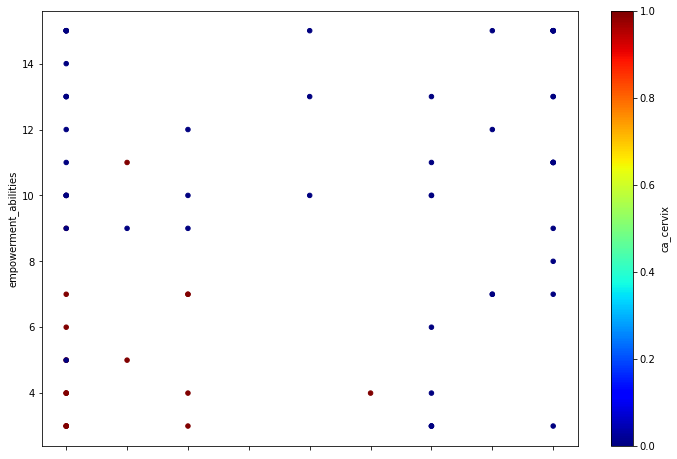

In [ ]:
sobar.plot.scatter(x = 'perception_severity', y = 'empowerment_abilities', c= 'ca_cervix', figsize=(12,8), colormap='jet')

In [ ]:
print("Total number of labels: {}".format(sobar.shape[0]))
print("Has cervical cancer: {}".format(sobar[sobar.ca_cervix == 1].shape[0]))
print("No cervical cancer: {}".format(sobar[sobar.ca_cervix == 0].shape[0]))

Total number of labels: 72
Has cervical cancer: 21
No cervical cancer: 51


In [ ]:
X=sobar.iloc[:, :-1]
X.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7


In [ ]:
y=sobar.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: ca_cervix, dtype: int64

In [ ]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1])

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9333333333333333


In [ ]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8666666666666667


In [ ]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9333333333333333


In [ ]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9333333333333333


In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[1.         1.         0.85714286 0.71428571 1.         1.
 1.         1.         1.         1.        ]


In [ ]:
print(scores.mean())

0.9571428571428571


In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.875      1.         1.         0.57142857 1.         1.
 0.71428571 1.         1.         0.85714286]


In [ ]:
print(scores.mean())

0.9017857142857142


In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.75       0.75       0.57142857 0.71428571 1.         0.71428571
 0.85714286 1.         1.         0.71428571]


In [ ]:
print(scores.mean())

0.8071428571428572


In [ ]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  

[0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571]


Text(0, 0.5, 'Cross-Validated Accuracy')

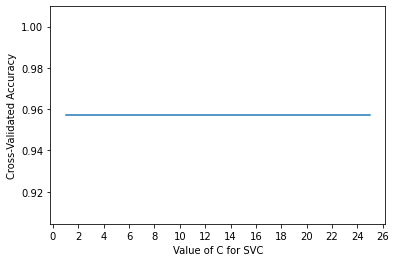

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)   

[0.9017857142857142, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571, 0.9571428571428571,

Text(0, 0.5, 'Cross-Validated Accuracy')

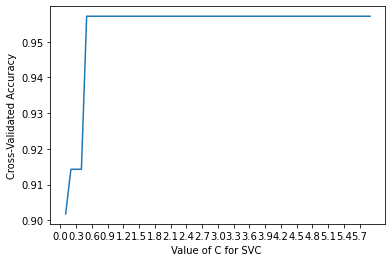

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.5)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.8666666666666667


In [ ]:
svc=SVC(kernel='linear',C=0.5)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[1.         1.         0.85714286 0.71428571 1.         1.
 1.         1.         1.         1.        ]
0.9571428571428571
